In [23]:
# -------------------------------------------------------------
# Netflix Dataset Analysis - Final Combined Version
# Includes all your charts + new Genre Trend & Strategic Insights
# -------------------------------------------------------------

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")


In [24]:
# -------------------------------------------------------------
# 1. Load the dataset
# -------------------------------------------------------------
df = pd.read_csv("/content/Netflix Dataset.csv", encoding='utf-8', low_memory=False)

print("Initial shape:", df.shape)
print("Columns:", df.columns.tolist())


Initial shape: (7789, 11)
Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [25]:
# -------------------------------------------------------------
# 2. Data Cleaning
# -------------------------------------------------------------
df.drop_duplicates(inplace=True)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['release_year'] = df['Release_Date'].dt.year

# Fill missing values
for col in ['Director', 'Cast', 'Country', 'Rating', 'Type', 'Duration']:
    df[col] = df[col].fillna('Unknown')

print("\nData cleaned successfully. Nulls after cleaning:")
print(df.isnull().sum())



Data cleaned successfully. Nulls after cleaning:
Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    98
Rating           0
Duration         0
Type             0
Description      0
release_year    98
dtype: int64


/tmp/ipython-input-4009606124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


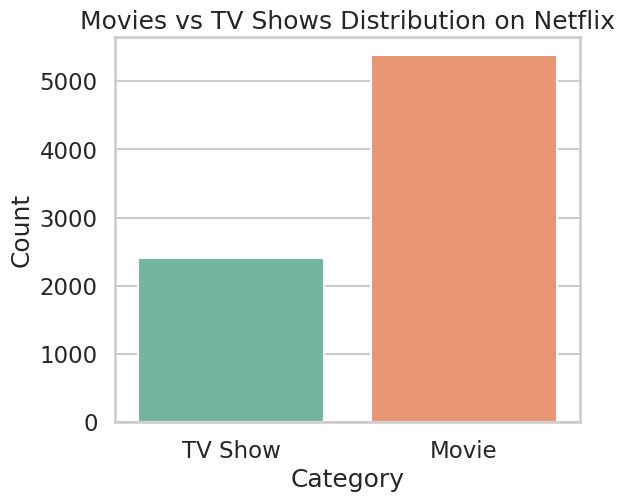

In [26]:
# -------------------------------------------------------------
# 3. Movies vs TV Shows distribution
# -------------------------------------------------------------
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title("Movies vs TV Shows Distribution on Netflix")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


Top 5 Types/Categories:
Type
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Name: count, dtype: int64


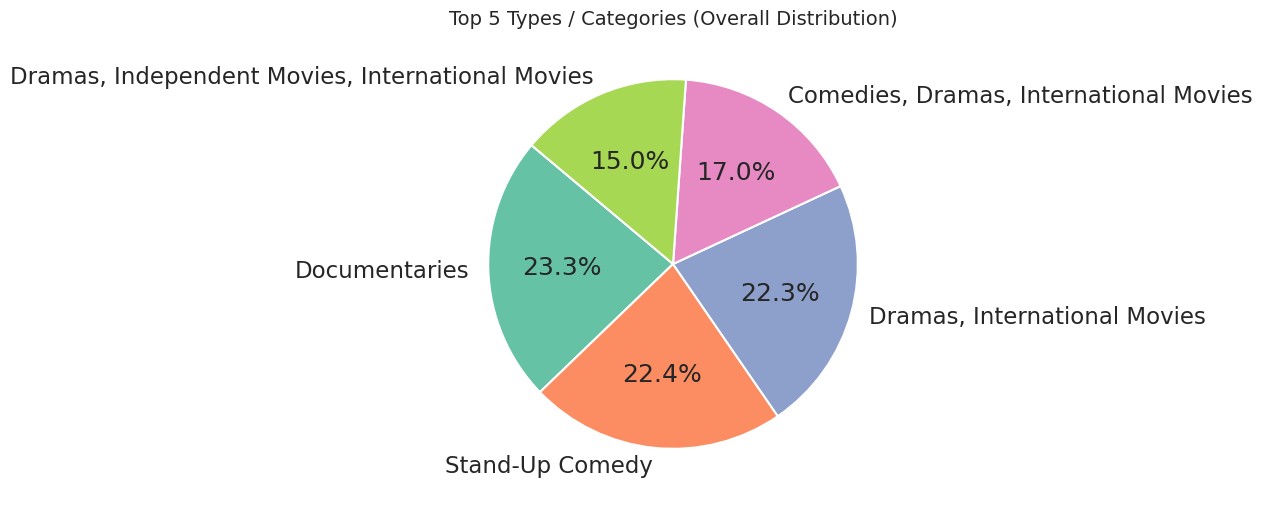

In [27]:

# -------------------------------------------------------------
# PIE CHART: Top 5 Types / Categories (Overall Distribution)
# -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Handle lowercase/uppercase column naming
if 'type' in df.columns:
    type_col = 'type'
elif 'Type' in df.columns:
    type_col = 'Type'
else:
    raise KeyError("Expected column 'Type' or 'type' not found in dataset.")

# Clean and standardize values
df[type_col] = df[type_col].astype(str).str.strip().str.title()

# Get top 5 types/categories
type_counts = df[type_col].value_counts().head(5)

print("Top 5 Types/Categories:")
print(type_counts)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2", len(type_counts))
)
plt.title('Top 5 Types / Categories (Overall Distribution)', fontsize=14)
plt.show()


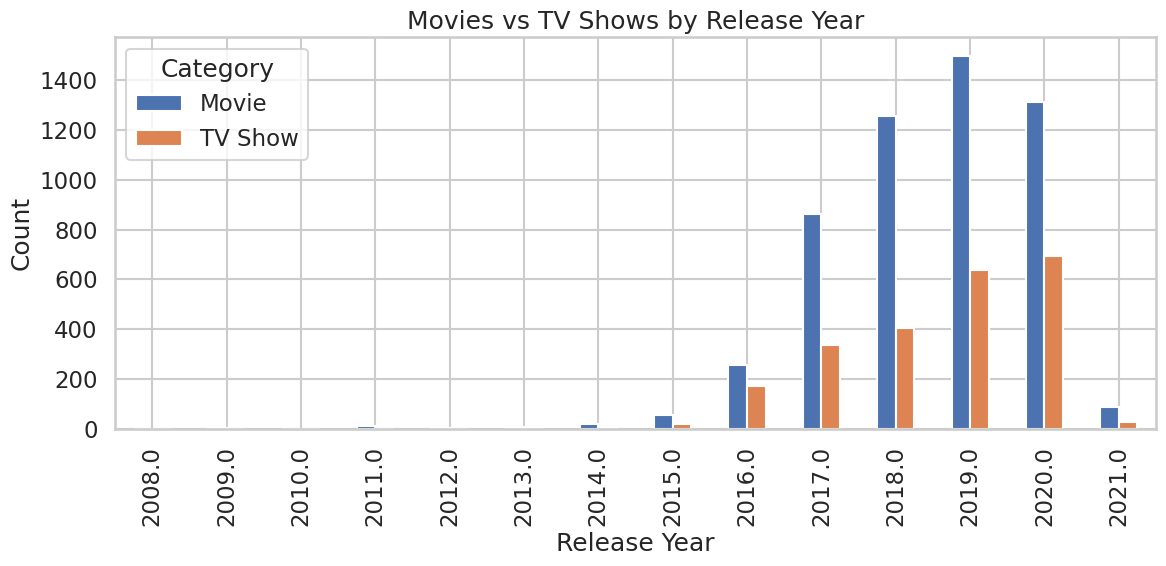

In [28]:
# -------------------------------------------------------------
# 4. Movies vs TV Shows over years
# -------------------------------------------------------------
mv_tv = df.dropna(subset=['release_year']).groupby(['release_year','Category']).size().unstack(fill_value=0)
mv_tv.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Movies vs TV Shows by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title="Category")
plt.tight_layout()
plt.show()


/tmp/ipython-input-44412662.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


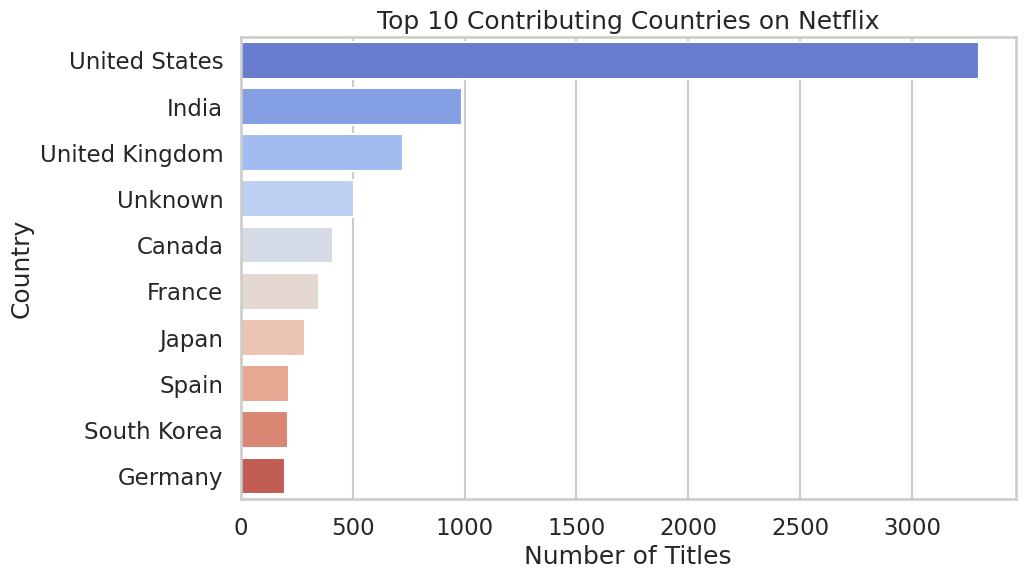

In [29]:
# -------------------------------------------------------------
# 5. Top 10 countries by number of titles
# -------------------------------------------------------------
df_country = df.copy()
df_country['Country'] = df_country['Country'].str.split(',')
df_country = df_country.explode('Country')
df_country['Country'] = df_country['Country'].str.strip()

top_countries = df_country['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Contributing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-4238007649.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='magma')


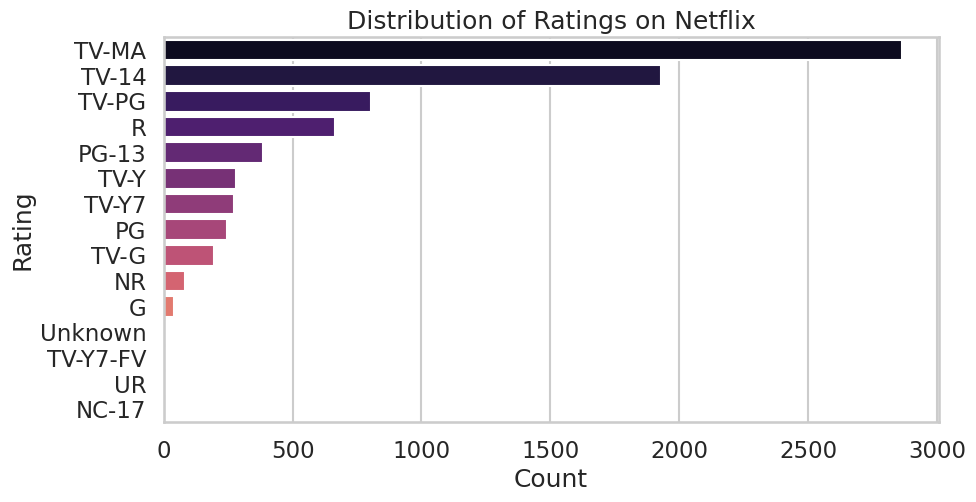

In [30]:
# -------------------------------------------------------------
# 6. Ratings distribution
# -------------------------------------------------------------
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='magma')
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


/tmp/ipython-input-811548864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Duration'] = movies['Duration'].str.replace(' min', '').replace('Unknown', np.nan)
/tmp/ipython-input-811548864.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Duration'] = pd.to_numeric(movies['Duration'], errors='coerce')


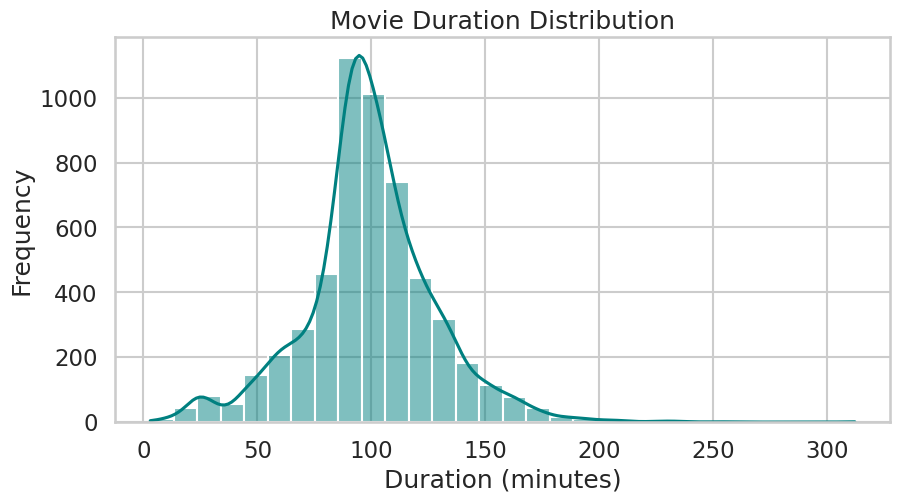

In [31]:
# -------------------------------------------------------------
# 7. Duration analysis (Movies only)
# -------------------------------------------------------------
movies = df[df['Category'] == 'Movie']
movies['Duration'] = movies['Duration'].str.replace(' min', '').replace('Unknown', np.nan)
movies['Duration'] = pd.to_numeric(movies['Duration'], errors='coerce')

plt.figure(figsize=(10,5))
sns.histplot(movies['Duration'].dropna(), bins=30, kde=True, color='teal')
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-2458954365.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


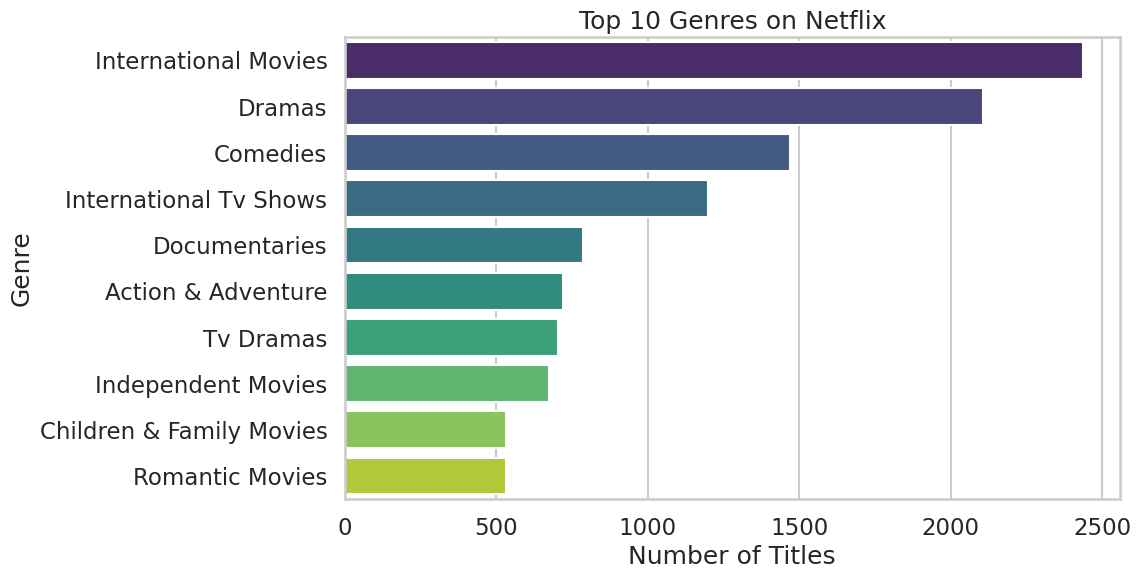

In [32]:
# -------------------------------------------------------------
# 8. Top Genres (from Type column)
# -------------------------------------------------------------
df['Type'] = df['Type'].fillna('Unknown')
all_genres = df['Type'].str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


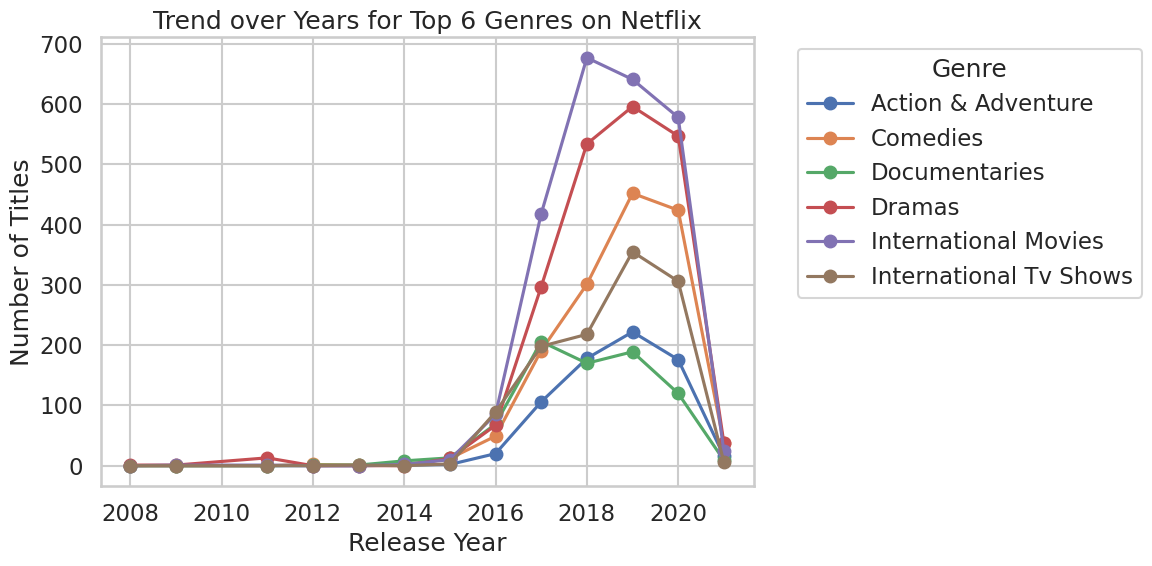

In [33]:
# -------------------------------------------------------------
# 9. NEW ADDITION: Genre Trend Over Time
# -------------------------------------------------------------
df_gen = df.dropna(subset=['release_year']).copy()
df_gen['genres_list'] = df_gen['Type'].str.split(',')
df_gen = df_gen.explode('genres_list')
df_gen['genre'] = df_gen['genres_list'].str.strip().replace('', 'Unknown')

top_n = 6
top_genres = df_gen['genre'].value_counts().head(top_n).index.tolist()
genre_trend = (df_gen[df_gen['genre'].isin(top_genres)]
               .groupby(['release_year', 'genre'])
               .size()
               .unstack(fill_value=0)
               .sort_index())

plt.figure(figsize=(12,6))
for g in genre_trend.columns:
    plt.plot(genre_trend.index, genre_trend[g], marker='o', label=g)
plt.title(f"Trend over Years for Top {top_n} Genres on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


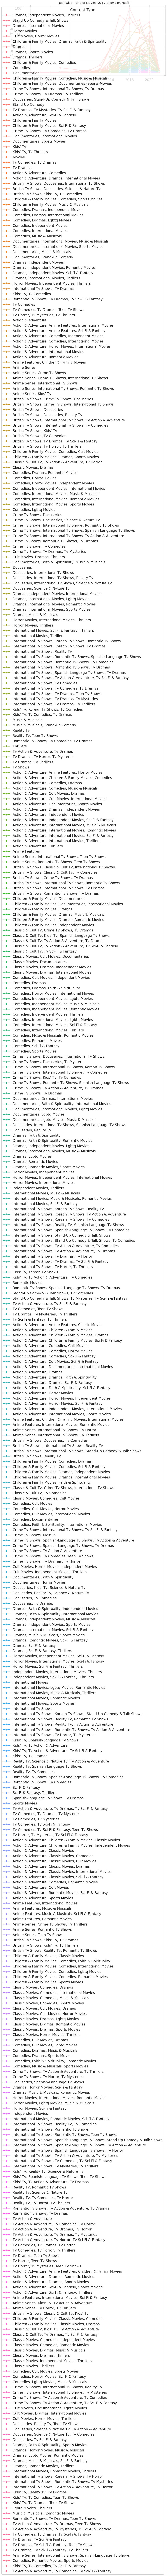

In [34]:
# ✅ Year-wise Trend of Movies vs TV Shows (final no-error version)

import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names (make all lowercase for safety)
df.columns = df.columns.str.lower()

# Extract year safely (works for both 'release_year' or 'date_added')
if 'release_year' not in df.columns:
    if 'date_added' in df.columns:
        df['release_year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
    else:
        raise KeyError("No column found for release year or date added!")

# Drop rows without valid year
df = df.dropna(subset=['release_year'])

# Convert year to integer for plotting
df['release_year'] = df['release_year'].astype(int)

# Check if 'type' column exists
if 'type' not in df.columns:
    raise KeyError("No column named 'type' found! Please check your dataset columns.")

# Group by year and content type
yearly_trend = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_trend, x='release_year', y='count', hue='type', marker='o')

plt.title('Year-wise Trend of Movies vs TV Shows on Netflix', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()



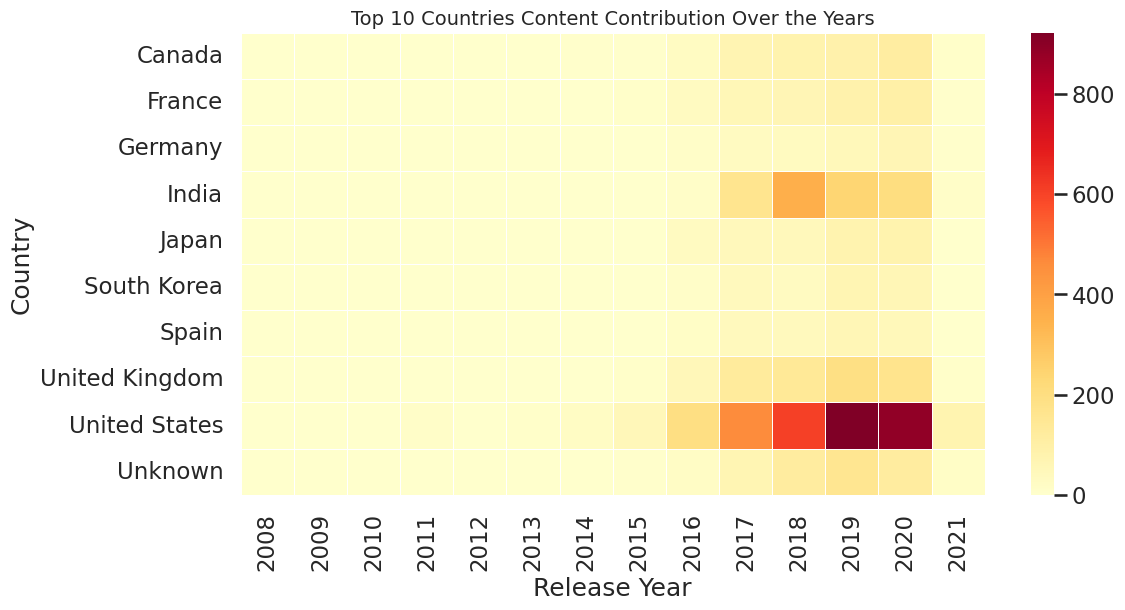

In [35]:
# ✅ Top 10 Countries Content Contribution Over the Years (final version)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure lowercase columns
df.columns = df.columns.str.lower()

# Extract release year safely
if 'release_year' not in df.columns:
    if 'date_added' in df.columns:
        df['release_year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
    else:
        raise KeyError("No column found for release year or date added!")

# Drop missing countries
df = df.dropna(subset=['country', 'release_year'])

# Handle multiple countries per title
df_countries = df.assign(country=df['country'].str.split(',')).explode('country')
df_countries['country'] = df_countries['country'].str.strip()

# Get top 10 countries overall
top_countries = df_countries['country'].value_counts().head(10).index

# Filter dataset for top countries only
df_top_countries = df_countries[df_countries['country'].isin(top_countries)]

# Create pivot table (country vs year)
country_year = df_top_countries.groupby(['country', 'release_year']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(country_year, cmap='YlOrRd', linewidths=0.5)
plt.title('Top 10 Countries Content Contribution Over the Years', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Country')
plt.show()


In [39]:

# -------------------------------------------------------------
# 10. NEW ADDITION: Strategic Insights & Recommendations
# -------------------------------------------------------------
print("\n" + "="*80)
print("🎯 STRATEGIC INSIGHTS & RECOMMENDATIONS")
print("="*80)

# Growth trend
if 'Movie' in mv_tv.columns and 'TV Show' in mv_tv.columns and not mv_tv.empty:
    movies_growth = mv_tv['Movie'].iloc[-1] - mv_tv['Movie'].iloc[0]
    shows_growth = mv_tv['TV Show'].iloc[-1] - mv_tv['TV Show'].iloc[0]
    if movies_growth > shows_growth:
        print(f"- Movie content has grown faster ({movies_growth} vs {shows_growth}). Focus on movie licensing and originals.")
    else:
        print(f"- TV Shows have shown stronger growth ({shows_growth} vs {movies_growth}). Focus on long-form series and franchises.")
else:
    print("- Growth trend data unavailable.")

# Genre insights
if not genre_trend.empty:
    rising_genres = genre_trend.iloc[-1].sort_values(ascending=False).head(3).index.tolist()
    print(f"- Top trending genres recently: {', '.join(rising_genres)}")
else:
    print("- Genre trend data unavailable.")

# Country insights
if top_countries is not None and len(top_countries) > 0:
    # If top_countries is a Series or Index
    if isinstance(top_countries, (pd.Series, pd.Index)):
        print(f"- Countries with highest representation: {', '.join(top_countries[:5])}")
    else:
        # If it's a list
        print(f"- Countries with highest representation: {', '.join(top_countries[:5])}")
else:
    print("- Country representation data unavailable.")

# Recommendations
print("""
✅ Recommendations:
1️⃣ Expand high-performing genres (like the trending ones above) in emerging regions.
2️⃣ Strengthen collaborations in top contributing countries (e.g., USA, India, UK).
3️⃣ Balance between Movies and TV Shows to maintain catalog diversity.
4️⃣ Explore localization and dubbing for international genre expansion.
5️⃣ Leverage data insights to decide content acquisition and production strategy.
""")





🎯 STRATEGIC INSIGHTS & RECOMMENDATIONS
- Movie content has grown faster (87 vs 28). Focus on movie licensing and originals.
- Top trending genres recently: Dramas, Comedies, International Movies
- Countries with highest representation: United States, India, United Kingdom, Unknown, Canada

✅ Recommendations:
1️⃣ Expand high-performing genres (like the trending ones above) in emerging regions.
2️⃣ Strengthen collaborations in top contributing countries (e.g., USA, India, UK).
3️⃣ Balance between Movies and TV Shows to maintain catalog diversity.
4️⃣ Explore localization and dubbing for international genre expansion.
5️⃣ Leverage data insights to decide content acquisition and production strategy.

